# Importing Libs

In [1]:
#checking for sklearn installation
import sklearn # istalled correctly

In [2]:
#importing all other libraries needed for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Importing Data

In [4]:
# data with outliers
path=r"C:\Users\Sam\Desktop\CF\Project 6 WORLD BANK\datasets\SPI Scores Clean and Formated 6.2.csv"
data=pd.read_csv(os.path.join(path))

In [7]:
# checking for execution
data.head(1)

,Unnamed: 0,Country,Date,Data Use,Data Services,Data Products,Data Sources,Data Infrastructure,SPI Score,Income,Region,Population,Score Category
0,0,Finland,2022,100.0,96.433333,88.4875,83.258333,100.0,93.635833,High income,Europe & Central Asia,5556106.0,High Score


In [8]:
data.shape

(1524, 13)

In [9]:
# data without outliers
path1=r"C:\Users\Sam\Desktop\CF\Project 6 WORLD BANK\datasets\SPI excluded outliers 6.3.csv"
data_no_outliers=pd.read_csv(os.path.join(path1))

In [10]:
# checking for execution
data_no_outliers.head(1)

,Country,Date,Data Use,Data Services,Data Products,Data Sources,Data Infrastructure,SPI Score,Income,Region,Population,Score Category
0,Finland,2022,100.0,96.433333,88.4875,83.258333,100.0,93.635833,High income,Europe & Central Asia,5556106.0,High Score


In [11]:
data_no_outliers.shape

(1496, 12)

In [12]:
# to show graphs in the notebook
%matplotlib inline

In [13]:
# missing values
data.isnull().sum()

Unnamed: 0             0
Country                0
Date                   0
Data Use               0
Data Services          0
Data Products          0
Data Sources           0
Data Infrastructure    0
SPI Score              0
Income                 0
Region                 0
Population             0
Score Category         0
dtype: int64

In [14]:
data_no_outliers.isnull().sum()

Country                0
Date                   0
Data Use               0
Data Services          0
Data Products          0
Data Sources           0
Data Infrastructure    0
SPI Score              0
Income                 0
Region                 0
Population             0
Score Category         0
dtype: int64

In [17]:
# duplicates
dup=data.duplicated()
dup.shape

(1524,)

In [19]:
dups=data_no_outliers.duplicated()
dups.shape

(1496,)

### Preparing for regression analysis

<Axes: xlabel='Income', ylabel='SPI Score'>

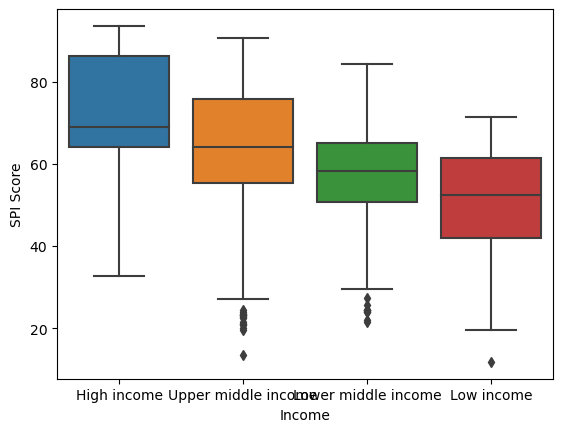

In [25]:
sns.boxplot(data=data_no_outliers, x="Income", y="SPI Score")

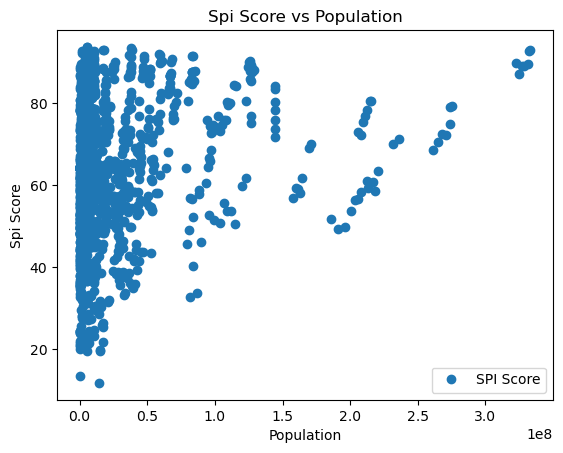

In [27]:
# creating a scatterplot for SPI Score and Population(Population-independent,SPI-dependent)
data_no_outliers.plot(x="Population",y="SPI Score",style="o")
plt.xlabel("Population")  
plt.ylabel("Spi Score")  
plt.show()

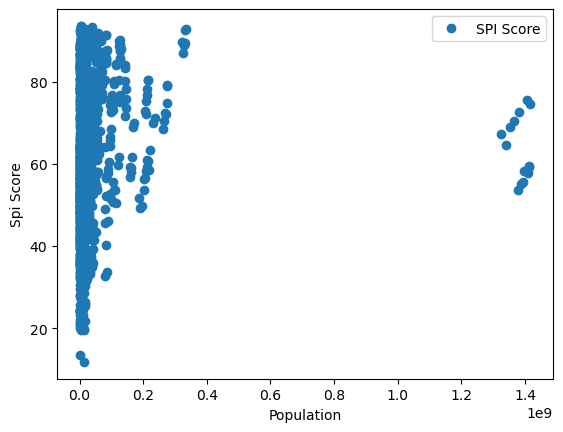

In [28]:
#creating a scatterplot for data with same independent and dependent variables with outliers to see the difference
data.plot(x="Population",y="SPI Score",style="o")
plt.xlabel("Population")  
plt.ylabel("Spi Score")  
plt.show()

## Hypothesis to test: If population is high, then the SPI Score is high.

#### Clearly data without outliers should be used for analysis

In [29]:
# Reshaping the variables into NumPy arrays and putting them into separate objects
X = data_no_outliers["Population"].values.reshape(-1,1)
y = data_no_outliers["SPI Score"].values.reshape(-1,1)

In [30]:
X

array([[5.5561060e+06],
       [5.4571270e+06],
       [3.8929902e+07],
       ...,
       [1.1225000e+04],
       [1.0751000e+05],
       [4.3670880e+06]])

In [31]:
y

array([[93.63583333],
       [93.49583333],
       [92.9225    ],
       ...,
       [64.07      ],
       [64.07      ],
       [64.07      ]])

In [32]:
# Splitting data into a training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regresssion analysis

In [33]:
# Creating a regression object
regression = LinearRegression()

In [34]:
# Fitting the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predicting values of y using X.
y_predicted = regression.predict(X_test)

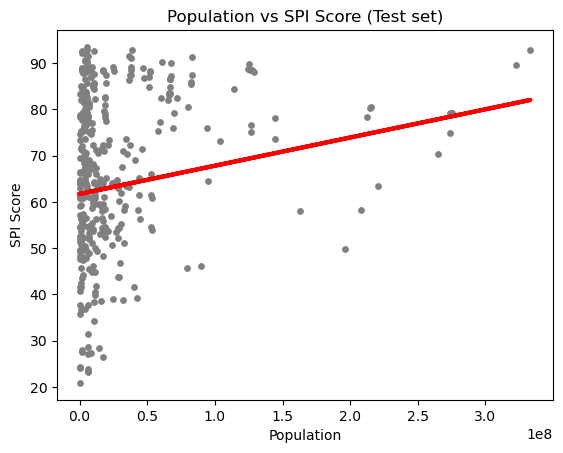

In [36]:
# Creating a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title("Population vs SPI Score (Test set)")
plot_test.xlabel("Population")
plot_test.ylabel("SPI Score")
plot_test.show()

In [37]:
# Create objects containing model summary statistics
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [38]:
# Print the model summary statistics to evaluate the performance of the model

print("Slope:" ,regression.coef_)
print("Mean squared error: ", rmse)
print("R2 score: ", r2)

Slope: [[6.0983766e-08]]
Mean squared error:  239.6498403713684
R2 score:  0.011404469434653897


## The slope is 0.000000060983766 which indicates a very weak positive correlation between population of the country and spi score they received. The MSE tells how close a regression line is to a set of points; I have a MSE of 239.65 which is a very big number give the dataset, this indicates that the regression line is not a good representation of the data. R2 which is a metric that tells you how well the model explains the variance in the data, where values closer to 0 indicate a poor fit; my R2 is 0.011 which is about 1%, telling me that my model is not a great fit at all.

In [39]:
y_predicted

array([[64.22975082],
       [61.81254937],
       [62.31535234],
       [65.37206336],
       [64.33042118],
       [61.97341667],
       [78.40000919],
       [64.60790835],
       [63.94805803],
       [61.72587125],
       [62.10908043],
       [63.96503761],
       [61.72463602],
       [61.72270656],
       [61.76035702],
       [64.99868507],
       [61.73011127],
       [61.80485492],
       [68.04132536],
       [62.32567336],
       [61.86688596],
       [62.79710769],
       [62.4167631 ],
       [61.76724471],
       [62.8782605 ],
       [61.89909423],
       [64.03916064],
       [78.41400923],
       [62.73909451],
       [61.76747602],
       [61.72173271],
       [62.93246006],
       [61.84875006],
       [61.7364823 ],
       [61.73996502],
       [74.39783154],
       [63.4454527 ],
       [62.11168126],
       [61.82696117],
       [61.72556182],
       [65.41680184],
       [62.44025252],
       [61.72198305],
       [62.90827646],
       [64.00383683],
       [64

In [43]:
# Create a dataframe comparing the actual and predicted values of y
data_predicted=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":y_predicted.flatten()})
data_predicted.head(10)

,Actual,Predicted
0,69.126667,64.229751
1,56.610833,61.812549
2,59.669167,62.315352
3,82.381250,65.372063
4,39.161250,64.330421
5,36.854167,61.973417
6,74.922083,78.400009
7,86.770417,64.607908
8,86.448750,63.948058
9,54.536250,61.725871


## Comparing how regression fits the training set

In [44]:
# Predicting
y_predicted_train = regression.predict(X_train)

In [45]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [46]:
print("Slope:" ,regression.coef_)
print("Mean squared error: ", rmse)
print("R2 score: ", r2)

Slope: [[6.0983766e-08]]
Mean squared error:  249.53853993804282
R2 score:  0.028170906584692235


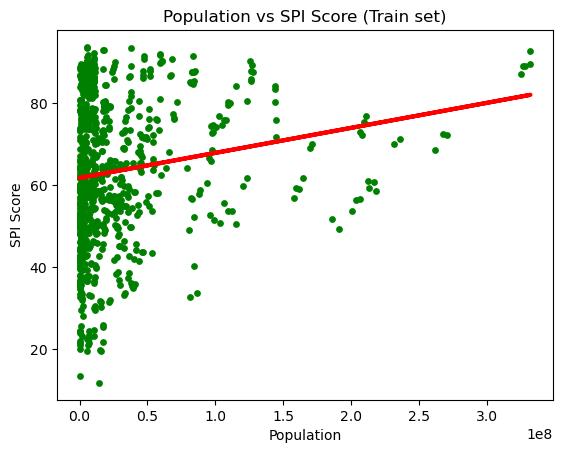

In [47]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title("Population vs SPI Score (Train set)")
plot_test.xlabel("Population")
plot_test.ylabel("SPI Score")
plot_test.show()

## R2 in the training set is a little higher, indicating that the model is not overfitted. There should not be any data bias that could affect the model, however, having only limited number of variables to test and make models from, the statistical results produced by the model were expected. Even though performing these analyses for the dataset I chose is gathering essential knowledge, I aknowledge now that the dataset chosen is not the best fit for this exercise and I will choose another independent project to work on to be included in my portfolio instead.